# Unit 5 - Financial Planning


In [68]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [69]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [70]:
# Set current amount of crypto assets
my_btc= 1.2
my_eth= 5.3

In [71]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [79]:
# Fetch current BTC price
resp_data_btc = requests.get(btc_url)
resp_data_btc
resp_content_btc = resp_data_btc.content
resp_content_btc
data_btc = resp_data_btc.json()
import json
#print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
resp_data_eth = requests.get(eth_url)
resp_content_eth = resp_data_eth.content
data_eth = resp_data_eth.json()
import json
#print(json.dumps(data_eth, indent=4)) 


# Compute current value of my crpto
btc_price = data_btc["data"]["1"]["quotes"]["USD"]["price"]
#print(btc_price)

eth_price = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
#print(eth_price)

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71167.20
The current value of your 5.3 ETH is $9769.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [80]:
# Current amount of shares
my_agg = 200
my_spy= 50

In [81]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#print(alpaca_api_key)
#print(alpaca_secret_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [82]:
# Format current date as ISO format
tickers = ["AGG", "SPY"]
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()
timeframe = "1D"


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810  394.53   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-17 00:00:00-04:00  398.12  393.3  397.22  61876016

In [83]:
# Pick AGG and SPY close prices
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $113.87
Current SPY closing price: $397.22


In [84]:
# Compute the current value of shares
agg_close_price = my_agg * agg_price
spy_close_price = my_spy * spy_price

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${agg_close_price:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${spy_close_price:0.2f}")

The current value of your 200 AGG shares is $22774.00
The current value of your 50 SPY shares is $19861.00


### Savings Health Analysis

In [87]:
# Set monthly household income
monthly_income=12000

#Create Portfolio with sum of BTC/ETH as well as SPY/AGG
total_portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, agg_close_price+spy_close_price]}

# Create savings DataFrame
df_savings= pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,80936.584
Shares,42635.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7F80A7DC8>],
      dtype=object)

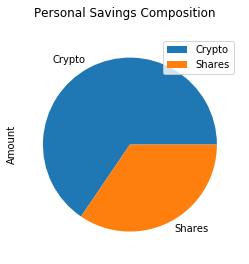

In [90]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True,title="Personal Savings Composition")

In [92]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
personal_savings = df_savings.sum().item()

# Validate saving health
if personal_savings > emergency_fund:
    print("Congratulations for having more than enough money in this fund for your financial goal!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal!")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your financial goal!')

Congratulations for having more than enough money in this fund for your financial goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [95]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-18', tz='America/New_York').isoformat()

In [97]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-23 00:00:00-04:00  117.30  117.520  117.3000  117.47  3482671  345.93   
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-23 00:00:00-04:00  345.9900  343.13  345.760   38718140  
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731

In [98]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [99]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-23 00:00:00-04:00  117.30  117.520  117.3000  117.47  3482671   
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-23 00:00:00-04:00          NaN  345.93  345.9900  343.13  345.760   
2020-10-26 00:00:00-04:00     0.001447  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   

                                                   
                              volume daily_return  
time                                               
2020-10-23 00:00:00-04:00   38718140          NaN  
2020-10-26 00:00:00-04:00   79491839    -0.018351  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163

In [100]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003551,1.002678,1.008215,1.000805,0.990294,0.995104,1.004979,1.006636,1.004201,1.007348,...,0.999189,1.010677,0.999994,0.999146,1.002675,1.002229,0.996425,0.996212,1.009041,1.005684
2,1.003819,1.003107,1.010368,0.995845,0.997197,0.991524,0.997415,1.005615,1.009582,1.004452,...,0.998978,1.020619,1.002898,1.004807,0.998224,1.003720,0.983377,0.997376,1.013302,1.016997
3,0.996230,0.994804,1.004157,1.000346,0.992360,0.992339,1.003975,1.021416,1.010549,0.999665,...,0.999312,1.024299,1.004722,1.006661,0.997851,1.010944,0.985042,0.986420,1.009495,1.011557
4,1.002950,0.995701,1.006276,1.005320,0.991340,0.993242,0.990122,1.036320,1.012969,0.997677,...,0.998846,1.030141,1.017516,1.002817,1.004627,1.013440,0.981918,0.975085,1.008038,1.021068
5,1.000620,0.996767,1.014147,0.995708,0.992925,0.988738,0.994733,1.032914,1.003063,0.995332,...,0.996116,1.027883,1.013792,1.000299,1.011975,1.017798,0.984231,0.978702,1.004921,1.025887
6,1.007477,1.001511,1.015244,0.991591,0.989619,0.992640,0.995123,1.029662,1.004807,1.001246,...,0.991878,1.020934,1.013475,1.009902,1.016672,1.010247,0.983055,0.970583,1.005168,1.023178
7,0.993275,1.007113,1.009886,0.996906,0.987424,1.007481,0.986114,1.041564,1.002631,0.998917,...,0.995988,1.007880,1.006635,1.010528,1.020721,1.002566,0.989668,0.968773,1.014018,1.026335
8,0.991754,1.007418,1.004368,0.989090,0.991131,1.002696,0.992750,1.041090,1.000131,0.986586,...,0.991445,1.009796,1.006854,1.010857,1.021303,1.003404,0.996955,0.972186,1.020429,1.028633
9,0.986063,0.996623,1.007806,0.988953,0.998948,0.998933,1.007413,1.038091,1.000400,0.991299,...,0.986297,1.011355,1.008549,1.014540,1.017051,1.008378,0.988499,0.975081,1.018963,1.032905


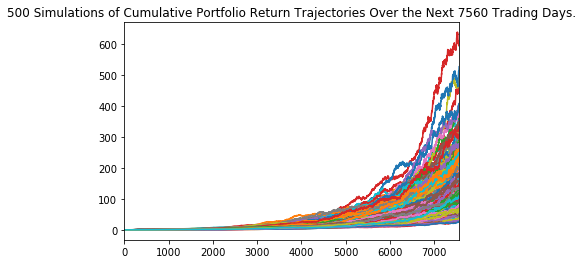

In [101]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

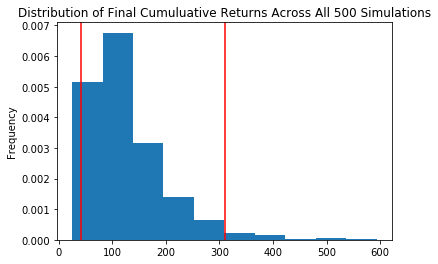

In [102]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_sumstat = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(MC_sumstat)

count           500.000000
mean            129.029282
std              75.323405
min              25.310278
25%              77.626944
50%             110.747425
75%             156.265456
max             593.047294
95% CI Lower     42.524851
95% CI Upper    310.817560
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [104]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower = round(MC_sumstat[8]*initial_investment,2)
upper = round(MC_sumstat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower} and ${upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $850497.01 and $6216351.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [105]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower = round(MC_sumstat[8]*initial_investment,2)
upper = round(MC_sumstat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower} and ${upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1275745.52 and $9324526.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [109]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [111]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000455,1.001038,0.988364,1.007421,0.998660,1.008569,0.989167,0.996156,1.008449,1.009568,...,1.005598,1.002392,0.999531,1.000694,1.011766,0.996544,0.994295,0.998228,1.000150,1.007708
2,0.997323,1.001711,0.995170,0.997806,0.990750,1.010425,0.990239,1.003028,0.997834,1.005272,...,1.000519,1.004032,1.007224,0.991576,1.028660,0.984923,1.006497,1.003410,1.003062,1.004069
3,0.997301,0.993122,0.996284,0.998081,0.988912,1.012415,0.991001,1.001966,1.004665,1.006244,...,1.000979,0.998321,1.005949,0.991838,1.031125,0.979059,1.014850,1.012063,1.021839,1.005223
4,1.003151,1.001725,0.995716,1.007342,0.984791,1.010106,0.991664,1.006094,1.002627,1.003359,...,0.999994,0.997340,0.999299,0.992621,1.033547,0.972196,1.005841,1.015100,1.022445,1.002650
5,1.004194,0.992428,0.998665,1.011106,0.998112,1.011145,1.000047,1.002426,1.002465,1.014802,...,1.006642,1.001407,1.001964,0.989399,1.031845,0.970718,1.008889,1.023598,1.030164,0.993646
6,0.992681,0.990445,1.003948,1.004327,0.997800,1.008688,1.009682,1.001310,1.005395,1.005488,...,1.007148,1.006273,1.006022,0.984314,1.026196,0.972285,1.006340,1.022980,1.035881,1.004603
7,0.998776,0.987658,0.994006,0.998870,0.995237,1.018294,1.023411,1.003326,1.000260,1.020898,...,1.000839,1.010544,1.006762,0.990626,1.043941,0.978181,1.002600,1.024820,1.034387,1.000813
8,0.992285,0.993679,0.993191,1.006910,0.995167,1.012903,1.036243,1.012464,1.004413,1.022944,...,1.005428,1.008853,1.008179,0.994091,1.043961,0.983343,1.001498,1.023698,1.025395,1.000563
9,0.994767,0.990963,0.995102,0.996469,1.000508,1.009722,1.027166,1.012673,1.003031,1.024578,...,0.997170,1.006465,0.996483,1.008641,1.039820,0.992622,1.010386,1.034764,1.026321,1.001810


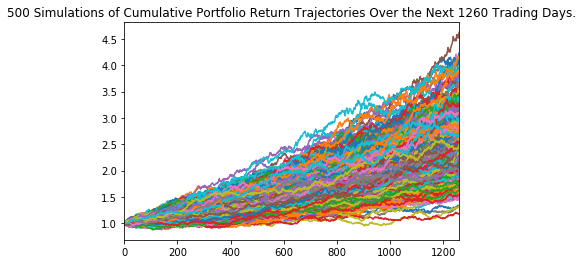

In [113]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

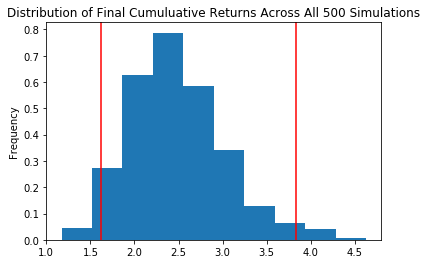

In [114]:
# Plot probability distribution and confidence intervals
dist_fiveprob = MC_fiveyear.plot_distribution()

In [116]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_fiveprob = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_fiveprob)

count           500.000000
mean              2.478902
std               0.537821
min               1.172978
25%               2.098099
50%               2.428913
75%               2.776622
max               4.626162
95% CI Lower      1.624779
95% CI Upper      3.833415
Name: 1260, dtype: float64


In [117]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_fiveprob[8]*60000,2)
ci_upper_five = round(tbl_fiveprob[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $97486.77 and $230004.88


### Ten Years Retirement Option

In [130]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_disttenyr = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_disttenyr.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [131]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_disttenyr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010743,0.987902,0.992588,0.995510,0.998743,0.999982,1.013499,1.008305,0.991842,0.992710,...,1.015716,1.005263,1.007774,0.992112,1.010030,0.991363,1.001830,0.997473,1.011336,0.999593
2,1.008794,0.998285,0.999286,0.991184,0.999871,0.996514,1.007205,1.005451,0.987969,0.994744,...,1.011669,1.002412,1.004365,0.999458,1.010786,0.997326,1.011012,1.012507,1.019867,0.996020
3,1.009605,0.991131,0.996383,0.992110,1.009944,0.997937,1.011214,1.009820,0.992805,0.996974,...,1.010890,1.006960,1.001036,0.999253,1.017520,0.998776,1.004069,1.005288,1.011872,1.003485
4,1.021449,0.995267,0.994364,0.997736,1.016692,0.998533,1.007636,1.013214,0.998580,0.986743,...,1.013718,1.017157,1.006775,0.998275,1.006978,0.995929,0.991246,1.004644,1.020487,0.995851
5,1.020989,0.989787,0.998071,0.998739,1.021003,1.011051,1.019787,1.012625,0.997867,0.985604,...,1.005864,1.013747,1.012874,0.998527,1.012640,1.008319,1.002796,1.001360,1.033559,0.983568
6,1.015477,0.996645,1.001406,0.999315,1.017641,1.003961,1.023143,1.003398,0.995926,0.976707,...,0.997325,1.009925,1.010070,1.001014,1.011100,1.008966,1.008288,1.000432,1.025360,0.989619
7,1.007552,0.997446,0.997970,0.996927,1.024638,1.000929,1.029046,1.013329,1.007002,0.983309,...,0.999508,1.013490,1.011282,0.995654,1.013597,1.013519,0.998630,1.003376,1.017112,0.989338
8,0.999316,0.994957,0.983568,1.001262,1.022087,1.008842,1.029925,1.022778,1.008691,0.978029,...,0.997095,1.012343,1.008540,0.994040,1.018190,1.016487,0.992843,1.021301,1.013844,0.991223
9,1.009571,0.990066,0.980877,1.000147,1.017959,1.010785,1.029274,1.023006,1.016245,0.978088,...,0.993724,1.007394,1.014523,0.991897,1.023771,1.013075,0.992904,1.015241,1.005250,0.992961


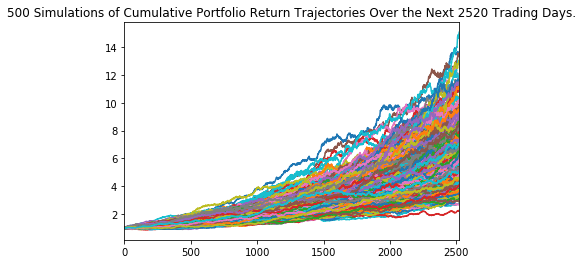

In [132]:
# Plot simulation outcomes
lineplot_ten = MC_even_disttenyr.plot_simulation()

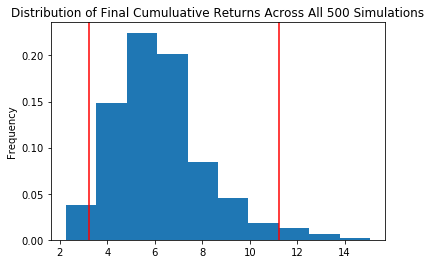

In [133]:
# Plot probability distribution and confidence intervals
distplot_ten = MC_even_disttenyr.plot_distribution()

In [134]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_even_disttenyr.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              6.223037
std               1.967882
min               2.249965
25%               4.855470
50%               5.998954
75%               7.237526
max              15.071047
95% CI Lower      3.210354
95% CI Upper     11.241722
Name: 2520, dtype: float64


In [136]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $192621.21 and $674503.34
